In [2]:
!pip install controlnet-aux

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 2.3 MB/s eta 0:00:00
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If yo

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ImageProcessorPipeline, DrawCheckerboardProcessor, FillBackgroundProcessor
from PIL import Image, ImageDraw
from IPython.display import display

geometry = ImageProcessorPipeline(size=(512, 768))
geometry.addTask(DrawCheckerboardProcessor(
    size = (256, 384)
))
geometry.addTask(FillBackgroundProcessor(background = "white"))
image = geometry()
display(image)

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import shapeGeometryPipeline, RandomChoiceArgument
from PIL import Image
from IPython.display import display


geom = shapeGeometryPipeline(size=(512, 768), background="lightgrey", shapes=10, foreground=RandomChoiceArgument(["black", "darkgrey"]), symmetry="none")
image = geom()
display(image)

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import spiralGeometryPipeline
from PIL import Image
from IPython.display import display


geom = spiralGeometryPipeline(background="black", fill="black", outline="white", shapes=3, maxsize = 96, steps=16)
image = geom()
display(image)

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import checkerboardGeometryPipeline, SaturationProcessor, GaussianBlurProcessor, GaussianNoiseProcessor
from PIL import Image
from IPython.display import display


geom = checkerboardGeometryPipeline(size=(512, 768), background="lightgreen", foreground="magenta", blocksize=(512//3, 768//3), start = "white")
geom.addTask(SaturationProcessor(saturation=-0.5))
geom.addTask(GaussianNoiseProcessor(sigma=10))
geom.addTask(GaussianBlurProcessor(radius=2))
image = geom()
display(image)

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ImageProcessorPipeline, SimpleTransformProcessor, InitImageProcessor
from PIL import Image
from IPython.display import display

image = Image.open("data/test.png")

geometry = ImageProcessorPipeline()
geometry.addTask(InitImageProcessor(image))
geometry.addTask(SimpleTransformProcessor(type="rotate90"))

image = geometry()
display(image)


In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ImageProcessorPipeline, CannyEdgeProcessor, InitImageProcessor
from PIL import Image
from IPython.display import display

image = Image.open("data/rabbit.png")

geometry = ImageProcessorPipeline()
geometry.addTask(InitImageProcessor(image))
geometry.addTask(CannyEdgeProcessor())

image = geometry()
display(image)

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ImageProcessorPipeline, CannyEdgeProcessor, InitImageProcessor
from PIL import Image
from IPython.display import display

image = Image.open("data/rabbit.png")

geometry = ImageProcessorPipeline()
geometry.addTask(InitImageProcessor(image))
geometry.addTask(CannyEdgeProcessor())

image = geometry()
display(image)

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ( ImageProcessorPipeline, DepthEstimationProcessor, NormalEstimationProcessor, SegmentationProcessor, 
                         EdgeDetectionProcessor, StraightLineDetectionProcessor, PoseDetectionProcessor, InitImageProcessor )
from PIL import Image
from IPython.display import display

image = Image.open("data/pose.png")

geometry = ImageProcessorPipeline()
geometry.addTask(InitImageProcessor(image))
# geometry.addTask(DepthEstimationProcessor())
# geometry.addTask(NormalEstimationProcessor())
# geometry.addTask(SegmentationProcessor())
# geometry.addTask(EdgeDetectionProcessor())
# geometry.addTask(StraightLineDetectionProcessor())
geometry.addTask(PoseDetectionProcessor())

image = geometry()
display(image)

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ( ImageProcessorPipeline, DrawGeometricSpiralProcessor, RandomChoiceArgument, FillBackgroundProcessor )
from PIL import Image
from IPython.display import display


pipeline = ImageProcessorPipeline(size=RandomChoiceArgument([(512, 768), (768, 512)]))
pipeline.addTask(DrawGeometricSpiralProcessor(startx=32, starty=32, endx=-32, endy=-32, iterations = 14, direction = RandomChoiceArgument(["up", "down", "left", "right"]), turn=RandomChoiceArgument(["clockwise", "anticlockwise"]),
                                              draw=RandomChoiceArgument([(True, True), (True, False), (False, True)])))
pipeline.addTask(FillBackgroundProcessor(background = "black"))


image = pipeline()
display(image)

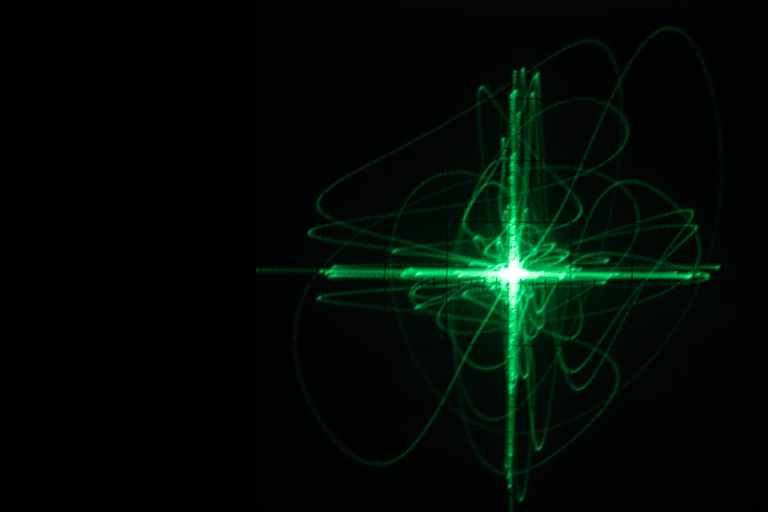

In [14]:
import path
path.setPathLocalNotebook()

from diffuserslib import ( RandomChoiceArgument, RandomImage, transformResize )
from PIL import Image
from IPython.display import display

pipeline = transformResize(image=RandomImage.fromDirectory('/Users/rob/GoogleDrive/stable-diffusion/initimages/oscilloscope'), 
                           transform=RandomChoiceArgument(["fliphorizontal", "flipvertical", "rotate90", "rotate180", "rotate270", "none"]),
                           resizetype=RandomChoiceArgument(["resize", "extend"]), size=RandomChoiceArgument([(512, 768), (768, 512)]),
                           halign=RandomChoiceArgument(["left", "right", "centre"]), valign=RandomChoiceArgument(["top", "bottom", "centre"]), fill="black")

image = pipeline()
display(image)